# Homework 8
Eric Gagliano (egagli)

## Problem 1: Air Temperature Observations in Complex Terrain

### A. Plot the temperature observations (AIR_TEMPERATURE) at all sites on one plot over time; use the title, xlabel, and ylabel commands to label your plot and its axes. Use xlim to zoom in and examine the data at finer scales. Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another. (you do not need to actually compute correlation coefficents here, just describe it qualitatively)

In [1]:
#imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd 
%matplotlib inline

# SVD function from scipy
from scipy.linalg import svd

# we'll use scipy's IO library and datetime to read .mat files
import scipy.io as sio 
import datetime as dt

Optional: Download North_Fork_American_River_CA_18020128.json to add the American River watershed outline to your plots.

In [2]:
watershed = gpd.read_file('North_Fork_American_River_CA_18020128.json')

In [3]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

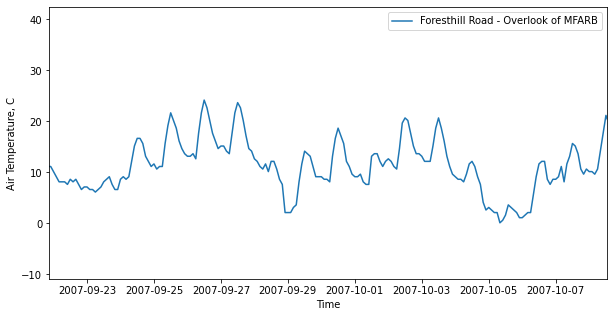

In [4]:
site = 0 # plot the first site of 21

plt.figure(figsize=(10,5))
plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[100], dates[500])); 

### B. Use the command: [U,S,V] = scipy.linalg.svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False) (read the documentation for this function here) to calculate the PCs, variances, and EOFs, respectively, of AIR_TEMPERATURE_ZEROMEAN (this is a version of the dataset where the mean temperature at each station has been subtracted out). Describe, qualitatively, how the variance is distributed among the patterns; how much is described by the leading pattern? By the second pattern?

In [5]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False)

### C. Plot the leading pattern's spatial weights (EOF) against latitude and longitude. Describe the first pattern's spatial weights' sign and variability.

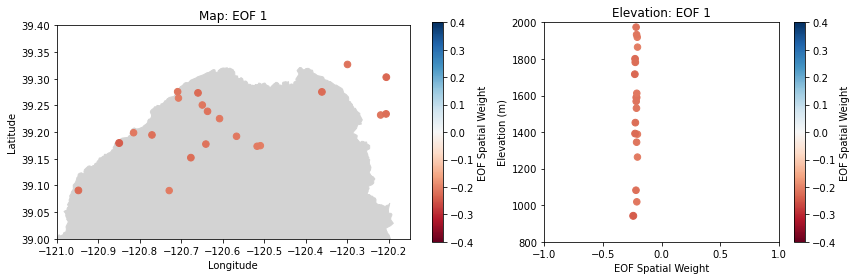

In [6]:
i = 0 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey', ax=ax[0])

# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

### D. Plot the leading pattern's temporal weights (PCs) over time. When are they positive and when are they negative? Consider the PCs' sign and magnitude, and consider the sign of the EOF in Part C. When does this pattern generate warmer-than-normal temperatures? Colder-thannormal temperatures? Are the anomalies associated with this pattern of the same sign at all sites?

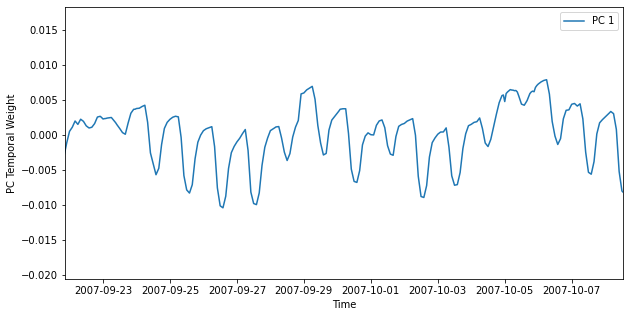

In [7]:
i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

### E. Repeat C) and D) for the 2nd-leading pattern. Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?

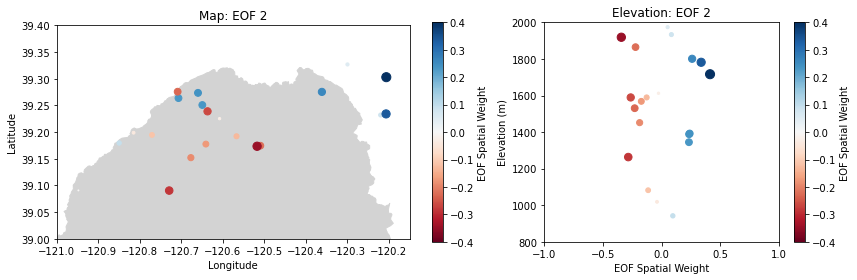

In [8]:
i = 1 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey', ax=ax[0])

# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

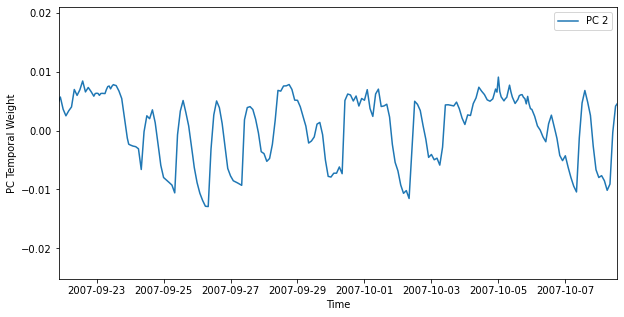

In [9]:
i = 1 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

## Problem 2: Timeseries Analysis

### A. Following lab 8-2, use Fourier Analysis to determine the dominant frequencies and periods of oscilliation of the water level data provided (waterlevel.mat). Based on what you find, where (in what type of environment) do you think this water level was measured?

In [10]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# we'll use scipy's IO library to read .mat files
import scipy.io as sio 

In [11]:
def power_spectral_density(x, sf):
    # perform fft on x
    f = np.fft.fft(x)
    
    # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)
    p = np.abs(f[:f.size//2]) 
    
    # Create freq array 
    _freq = np.fft.fftfreq(f.size, sf)
    # (but only take the first half, positive frequencies)
    freq = _freq[:_freq.size//2]
    return freq, p

In [12]:
data = sio.loadmat('waterlevel.mat')

In [13]:
# previiew the data dictionary we just opened with scipy
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Nov 13 14:19:05 2015',
 '__version__': '1.0',
 '__globals__': [],
 't': array([[4.16666667e-02, 8.33333333e-02, 1.25000000e-01, ...,
         3.64916667e+02, 3.64958333e+02, 3.65000000e+02]]),
 'Level': array([[11.02017583, 16.13432258, 19.91296503, ..., 16.22284226,
          9.6593712 , 12.51936994]]),
 'N': array([[8760]], dtype=uint16),
 'sf': array([[24]], dtype=uint8)}

In [14]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'Level', 'N', 'sf'])

In [15]:
time = data['t'][0] # time, in days
level = data['Level'][0] # water level data, in cm
N = data['N'][0][0] # number of data points
sf = data['sf'][0][0] # sampling frequency, in hours

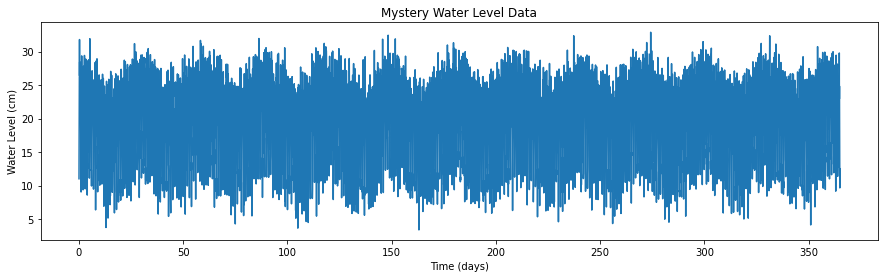

In [16]:
plt.figure(figsize=(15,4))
plt.plot(time,level)
plt.xlabel('Time (days)')
plt.ylabel('Water Level (cm)')
plt.title('Mystery Water Level Data');

In [17]:
# fft of Qsum
sf = 24
Cns = np.fft.fft(level)
N = len(level) # make sure it's even
print(N)
p = np.abs(Cns[:N//2]) # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)

# Create freq array (but only take the first half, positive frequencies)
_freq = np.fft.fftfreq(Cns.size, 1/sf)
freq = _freq[:N//2]

8760


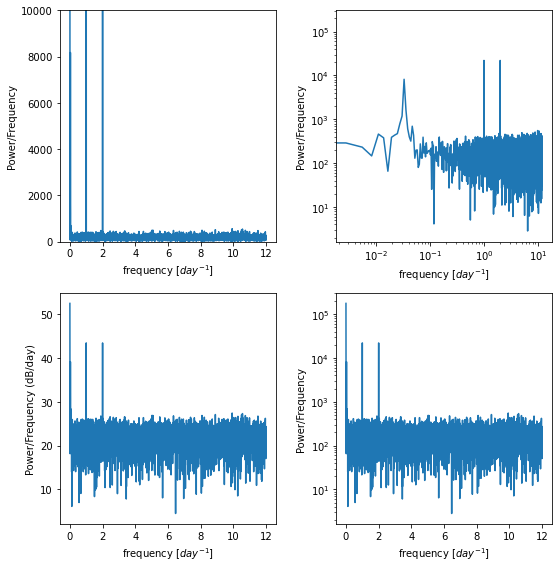

In [18]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(freq,p)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(freq,p)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(freq,10*np.log10(p))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(freq,p)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

In [19]:
winsize = 4380 # I chose this as 1/4th of a year sampled hourly, but you could change, just be even
nwin = np.floor(N/winsize)
xx = np.reshape(level,(int(winsize),int(nwin)),order='F')

In [20]:
Pwin = np.zeros((int(winsize/2), int(nwin)))

# Peform fft on each of the subsets of the total timeseries
for m in range(int(nwin)):
    fwin , Pwin[:,m] = power_spectral_density(xx[:,m],1/sf);  
    
p_mean = np.mean(Pwin,axis=1)

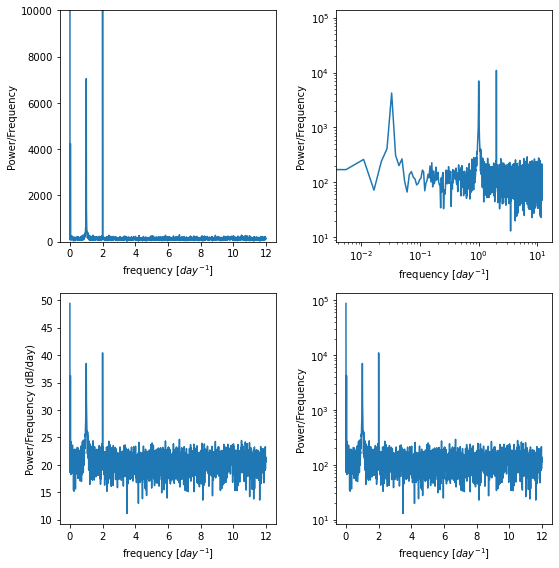

In [21]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(fwin,p_mean)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(fwin,p_mean)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(fwin,10*np.log10(p_mean))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(fwin,p_mean)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

# References

Note: A large amount of this code is adapted from the CEWA 565 course materials, predominantly from the lab 8 jupyter notebook which can be found in module 8 of the class website: https://mountain-hydrology-research-group.github.io/data-analysis/modules/module8.html